In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kneed
from kneed import KneeLocator
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
# input data
df = pd.read_csv('E:\PKL\Penyandang Disabilitas di Kota Yogyakarta 2022.csv',sep=",", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Kecamatan Subdistrict  14 non-null     object
 1   Tunggal                14 non-null     int64 
 2   Ganda                  14 non-null     int64 
 3   Multi                  14 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 580.0+ bytes


In [3]:
# ubah ke data perhitungan
data = df.drop('Kecamatan Subdistrict', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Tunggal  14 non-null     int64
 1   Ganda    14 non-null     int64
 2   Multi    14 non-null     int64
dtypes: int64(3)
memory usage: 468.0 bytes


In [4]:
# standarisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.13736557, -0.1747675 , -0.1747675 ],
       [-1.24813201, -1.03112822, -1.03112822],
       [-0.86682413, -0.41944199, -0.41944199],
       [ 1.58680919,  2.02730295,  2.02730295],
       [ 0.674986  , -0.1747675 , -0.1747675 ],
       [ 0.31025672,  0.43691874,  0.43691874],
       [-0.33630881, -0.29710474, -0.29710474],
       [-0.81708832, -0.78645373, -0.78645373],
       [-1.41391804, -1.15346547, -1.15346547],
       [-0.7507739 , -0.41944199, -0.41944199],
       [ 1.81890964,  2.02730295,  2.02730295],
       [-0.46893764, -1.15346547, -1.15346547],
       [ 1.25523712,  0.31458149,  0.31458149],
       [ 0.39314974,  0.80393048,  0.80393048]])

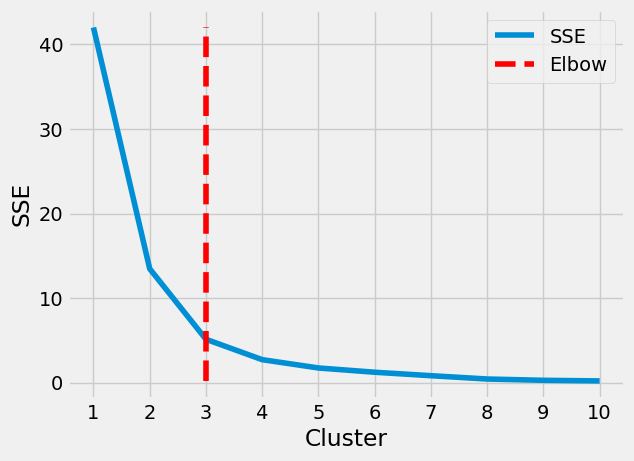

In [5]:
# memilih jumlah cluster yang sesuai menggunakan metode siku
# model building
kmeans_kwargs = {
    "init": "random",
    "n_init": 'auto',
    "max_iter": 300,
    "random_state": 42,}
# metode siku
sse_list = [] # membuat variabel untuk menyimpan nilai SSE
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse = kmeans.inertia_ # menghitung nilai SSE
    sse_list.append(sse) # menambahkan nilai SSE ke dalam variabel
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse_list, label='SSE') # menambahkan label 'SSE'
plt.xticks(range(1, 11))
plt.xlabel("Cluster")
plt.ylabel("SSE")
# menentukan nilai k optimal dengan fungsi knee_locator
kl = KneeLocator(range(1, 11), sse_list, curve="convex", direction="decreasing")
# menambahkan titik siku pada plot dengan warna merah dan label 'Elbow'
plt.vlines(kl.elbow, ymin=min(sse_list), ymax=max(sse_list), linestyles='dashed', color='red', label='Elbow')
# menambahkan legenda pada plot
plt.legend()
plt.show()

In [6]:
# jumlah cluster
k = kl.elbow

# model building
kmeans = KMeans(
    init="random",
    n_clusters=k,
    n_init='auto',
    max_iter=300,
    random_state=42)
kmeans.fit(data)

# nilai terkecil SSE
kmeans.inertia_

# lokasi final centroid
kmeans.cluster_centers_

# banyak iterasi
kmeans.n_iter_

# urutan label
kmeans.labels_

# Mengambil kolom yang ingin digunakan sebagai fitur untuk clustering
features = data.iloc[:, [0, 1]].values

# Membuat model K-Means dengan jumlah cluster k
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(features)

# Mendapatkan label untuk setiap data
labels = kmeans.labels_

# Mendapatkan koordinat pusat untuk setiap cluster
centroids = kmeans.cluster_centers_

# Menambahkan 1 ke label cluster
labels = kmeans.labels_ + 1

# Menambahkan kolom cluster ke data frame asli
df['cluster'] = labels

# Menampilkan data frame dengan informasi cluster
df

,Kecamatan Subdistrict,Tunggal,Ganda,Multi,cluster
0,Mantrijeron,128,14,14,3
1,Kraton,61,7,7,2
2,Mergangsan,84,12,12,2
3,Umbulharjo,232,32,32,1
4,Kotagede,177,14,14,3
5,Gondokusuman,155,19,19,3
6,Danurejan,116,13,13,2
7,Pakualaman,87,9,9,2
8,Gondomanan,51,6,6,2
9,Ngampilan,91,12,12,2


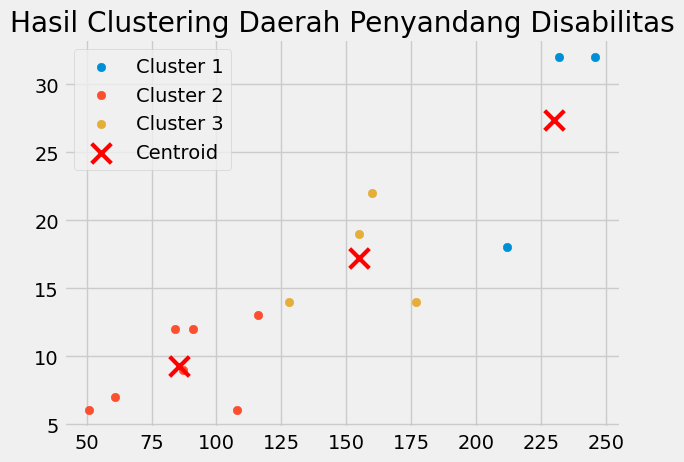

In [7]:
# mendapatkan nilai unik pada labels
unique_labels = np.unique(labels)
# membuat scatter plot untuk setiap nilai unik dengan label yang sesuai
for label in unique_labels:
    # memilih data yang memiliki label yang sama
    data = features[labels == label]
    # membuat scatter plot dengan warna yang berbeda untuk setiap label
    plt.scatter(data[:, 0], data[:, 1], label=f'Cluster {label}')
# menambahkan scatter plot untuk centroid dengan label 'Centroid'
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',
            s=200, linewidths=3, color='r', label='Centroid')
plt.title('Hasil Clustering Daerah Penyandang Disabilitas')
plt.legend()
plt.show()